In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium as fol

# Énoncé

Dans ce challenge, ouvert à tous, vous allez réaliser une analyse exploratoire avec un jeu de données portant sur les arbres de la ville de Paris, dans le cadre du programme "Végétalisons la ville".

Vos résultats contribueront à une optimisation des tournées pour l’entretien des arbres de la ville. Eh oui, moins de tournées signifie moins de trajets, et plus d’arbres entretenus.

Vous aurez ainsi un impact réel sur le futur de la ville de Paris ! 


# 1. Présentation générale du jeu de données

In [37]:
arbres = pd.read_csv("arbres.csv", sep = ';', dtype=None, low_memory=False)
arbres.head(5)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20.0,5.0,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65.0,8.0,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90.0,10.0,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60.0,8.0,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38.0,0.0,NaN,NaN,48.890435,2.315289


# 2. Inspection des données

In [38]:
arbres.shape

(200137, 18)

In [39]:
arbres.columns

Index(['id', 'type_emplacement', 'domanialite', 'arrondissement',
       'complement_addresse', 'numero', 'lieu', 'id_emplacement',
       'libelle_francais', 'genre', 'espece', 'variete', 'circonference_cm',
       'hauteur_m', 'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

In [40]:
arbres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  object 
 1   type_emplacement     200136 non-null  object 
 2   domanialite          200135 non-null  object 
 3   arrondissement       200136 non-null  object 
 4   complement_addresse  30901 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200136 non-null  object 
 7   id_emplacement       200136 non-null  object 
 8   libelle_francais     198639 non-null  object 
 9   genre                200120 non-null  object 
 10  espece               198384 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200136 non-null  float64
 13  hauteur_m            200136 non-null  float64
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

Le nombre de variables manquantes dans notre dataframe listé par colonnes

In [41]:
arbres.isnull().sum()

id                          0
type_emplacement            1
domanialite                 2
arrondissement              1
complement_addresse    169236
numero                 200137
lieu                        1
id_emplacement              1
libelle_francais         1498
genre                      17
espece                   1753
variete                163360
circonference_cm            1
hauteur_m                   1
stade_developpement     67205
remarquable             63099
geo_point_2d_a              1
geo_point_2d_b              1
dtype: int64

 - La matrice des données manquantes

<AxesSubplot:>

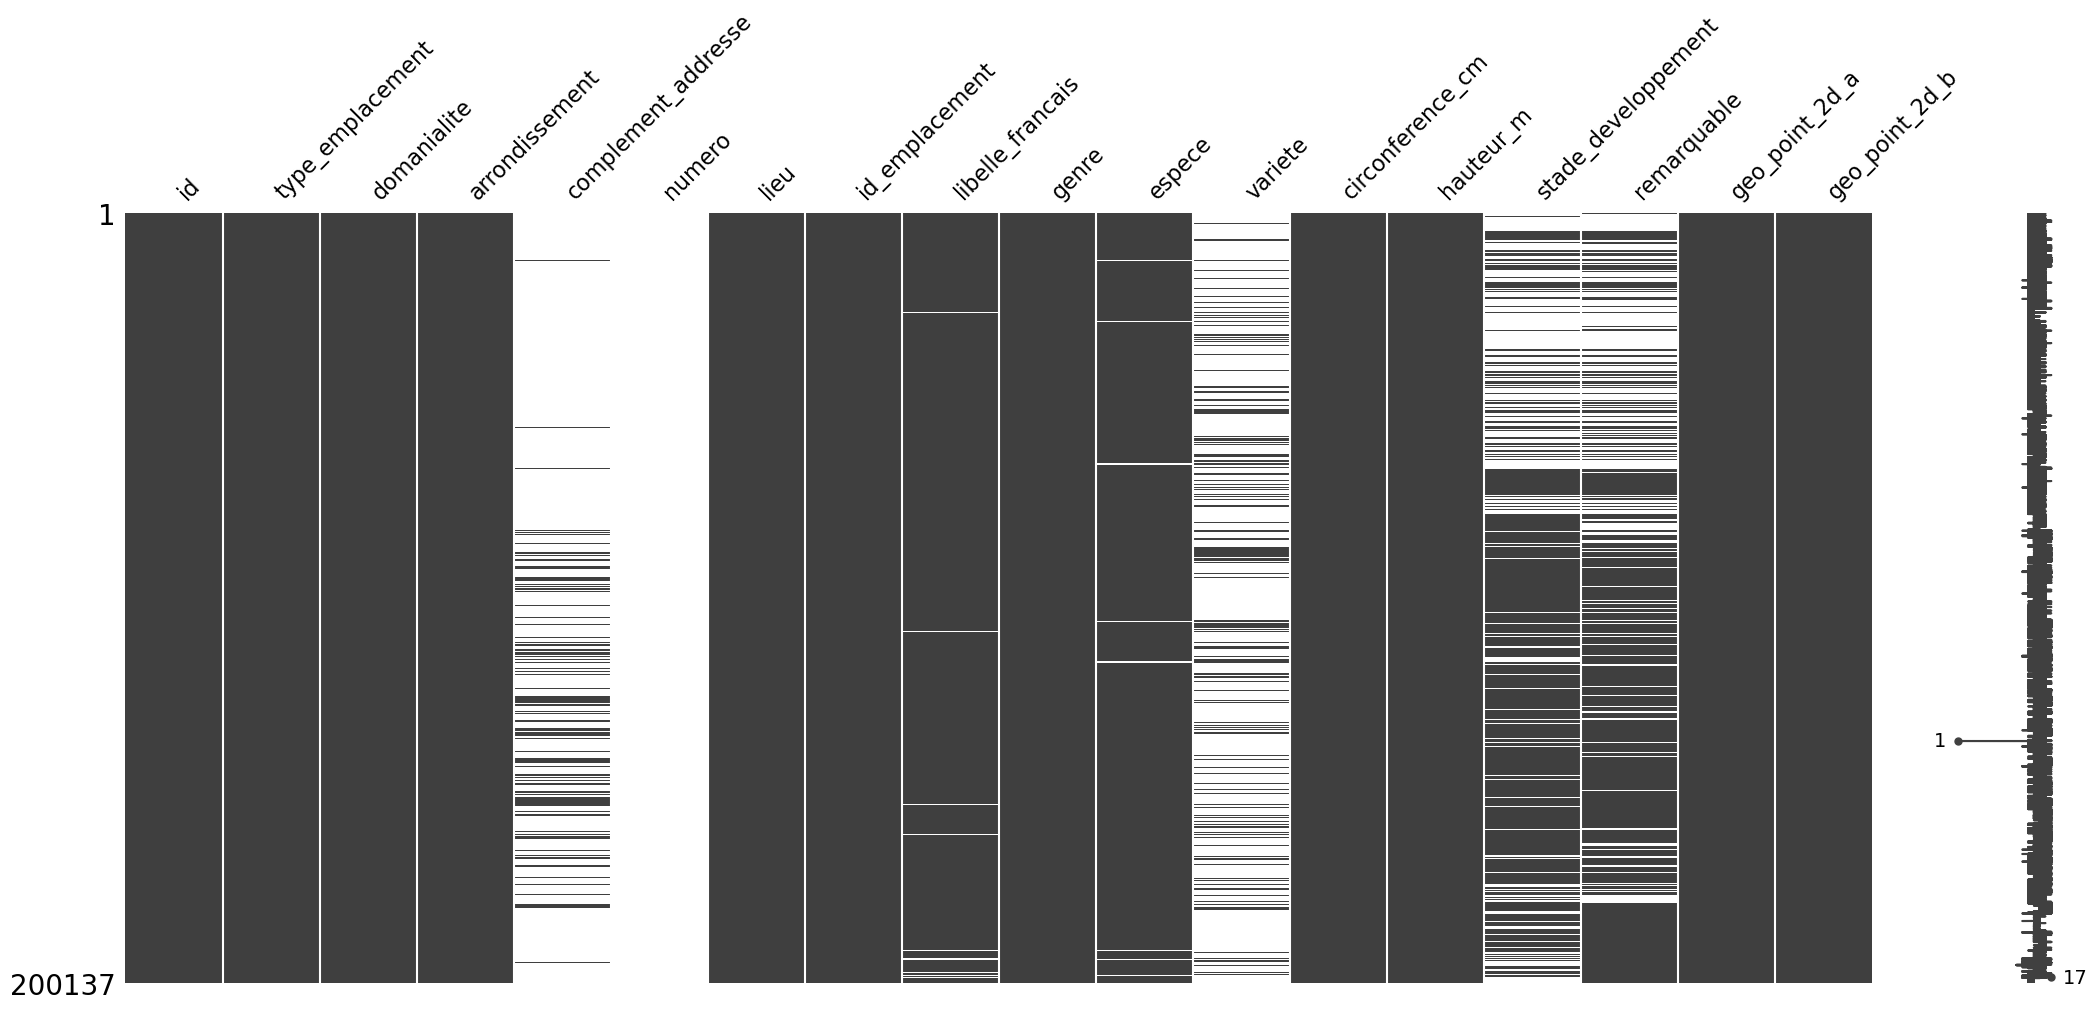

In [42]:
msno.matrix(arbres)

Remarque : Les colonnes numeros, complement_addresse, variete, stade_developpement, remarquable sont inexploitables

- Le diagramme à bandes

<AxesSubplot:>

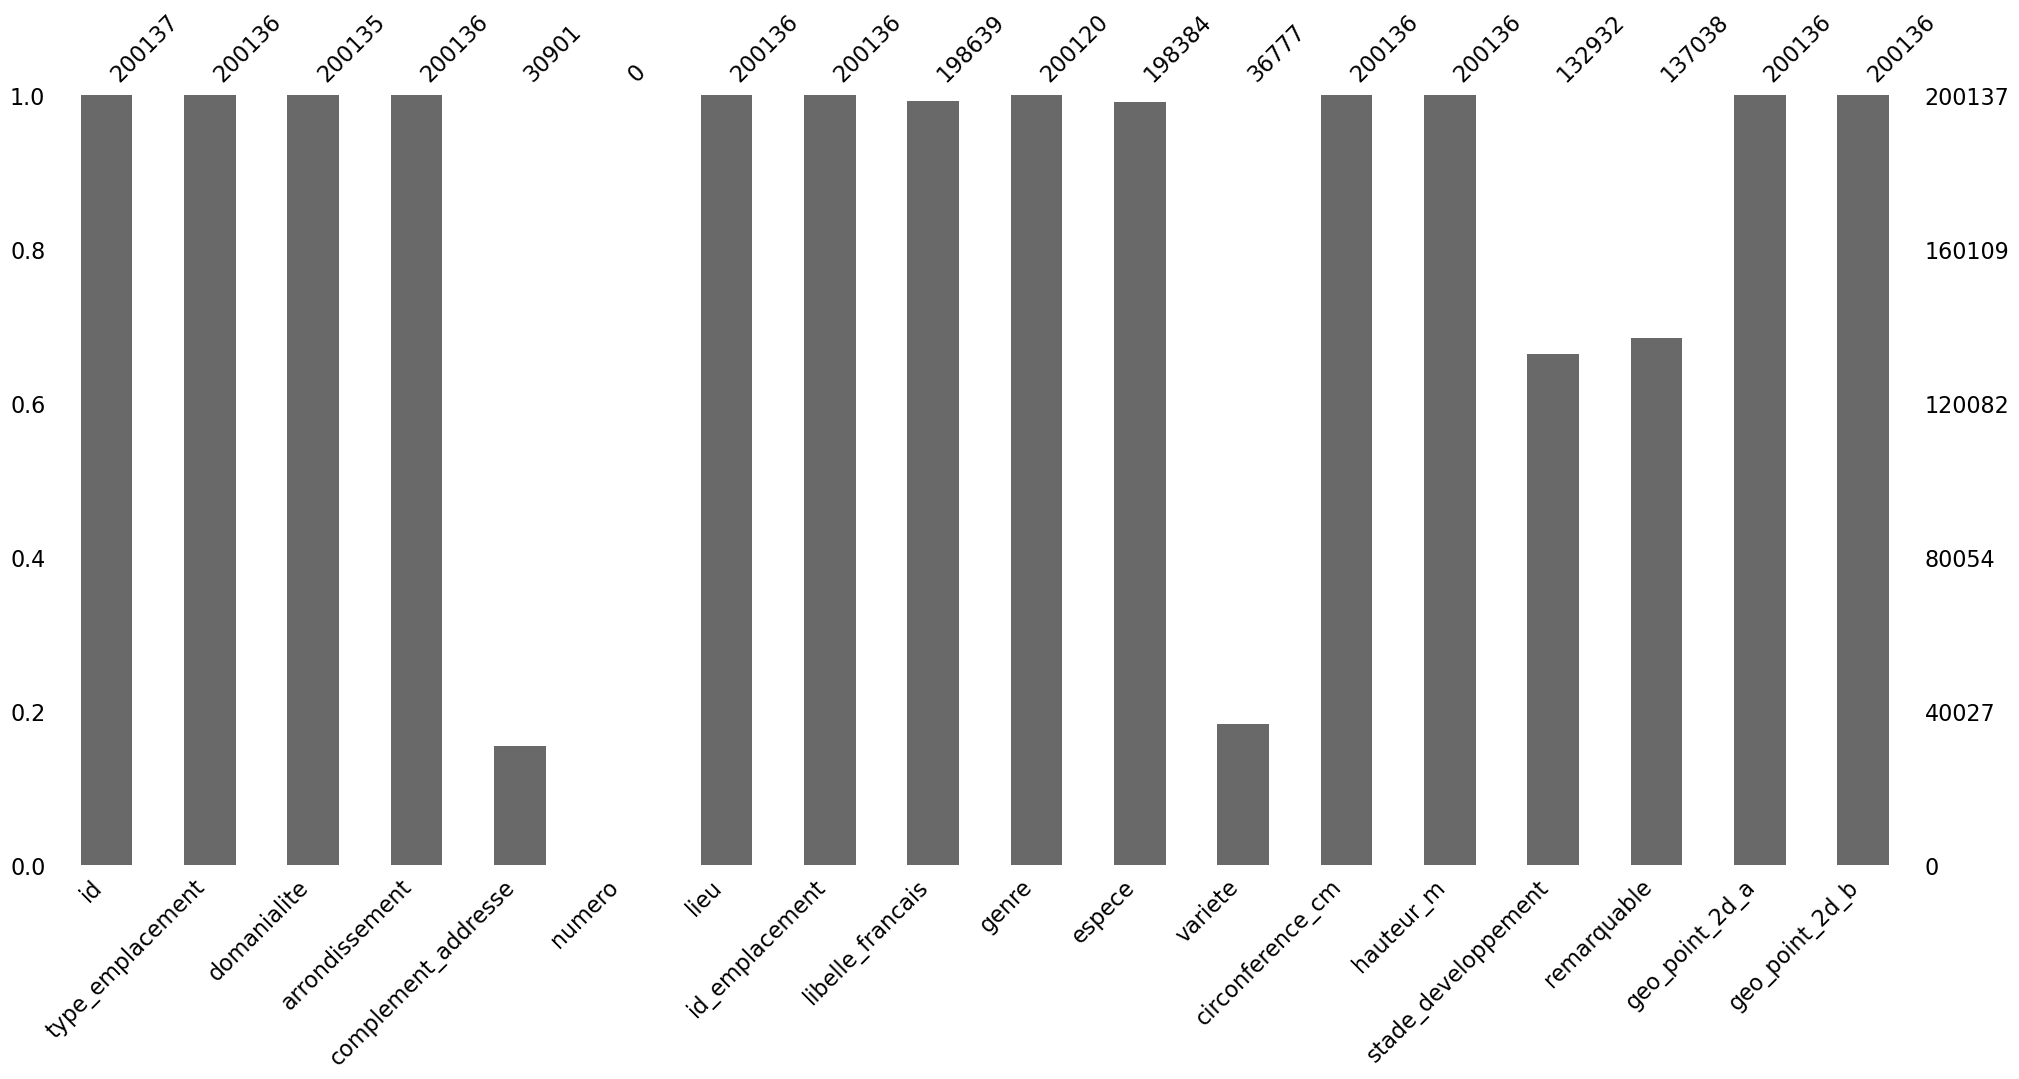

In [43]:
msno.bar(arbres)

- La carte de chaleur des données

<AxesSubplot:>

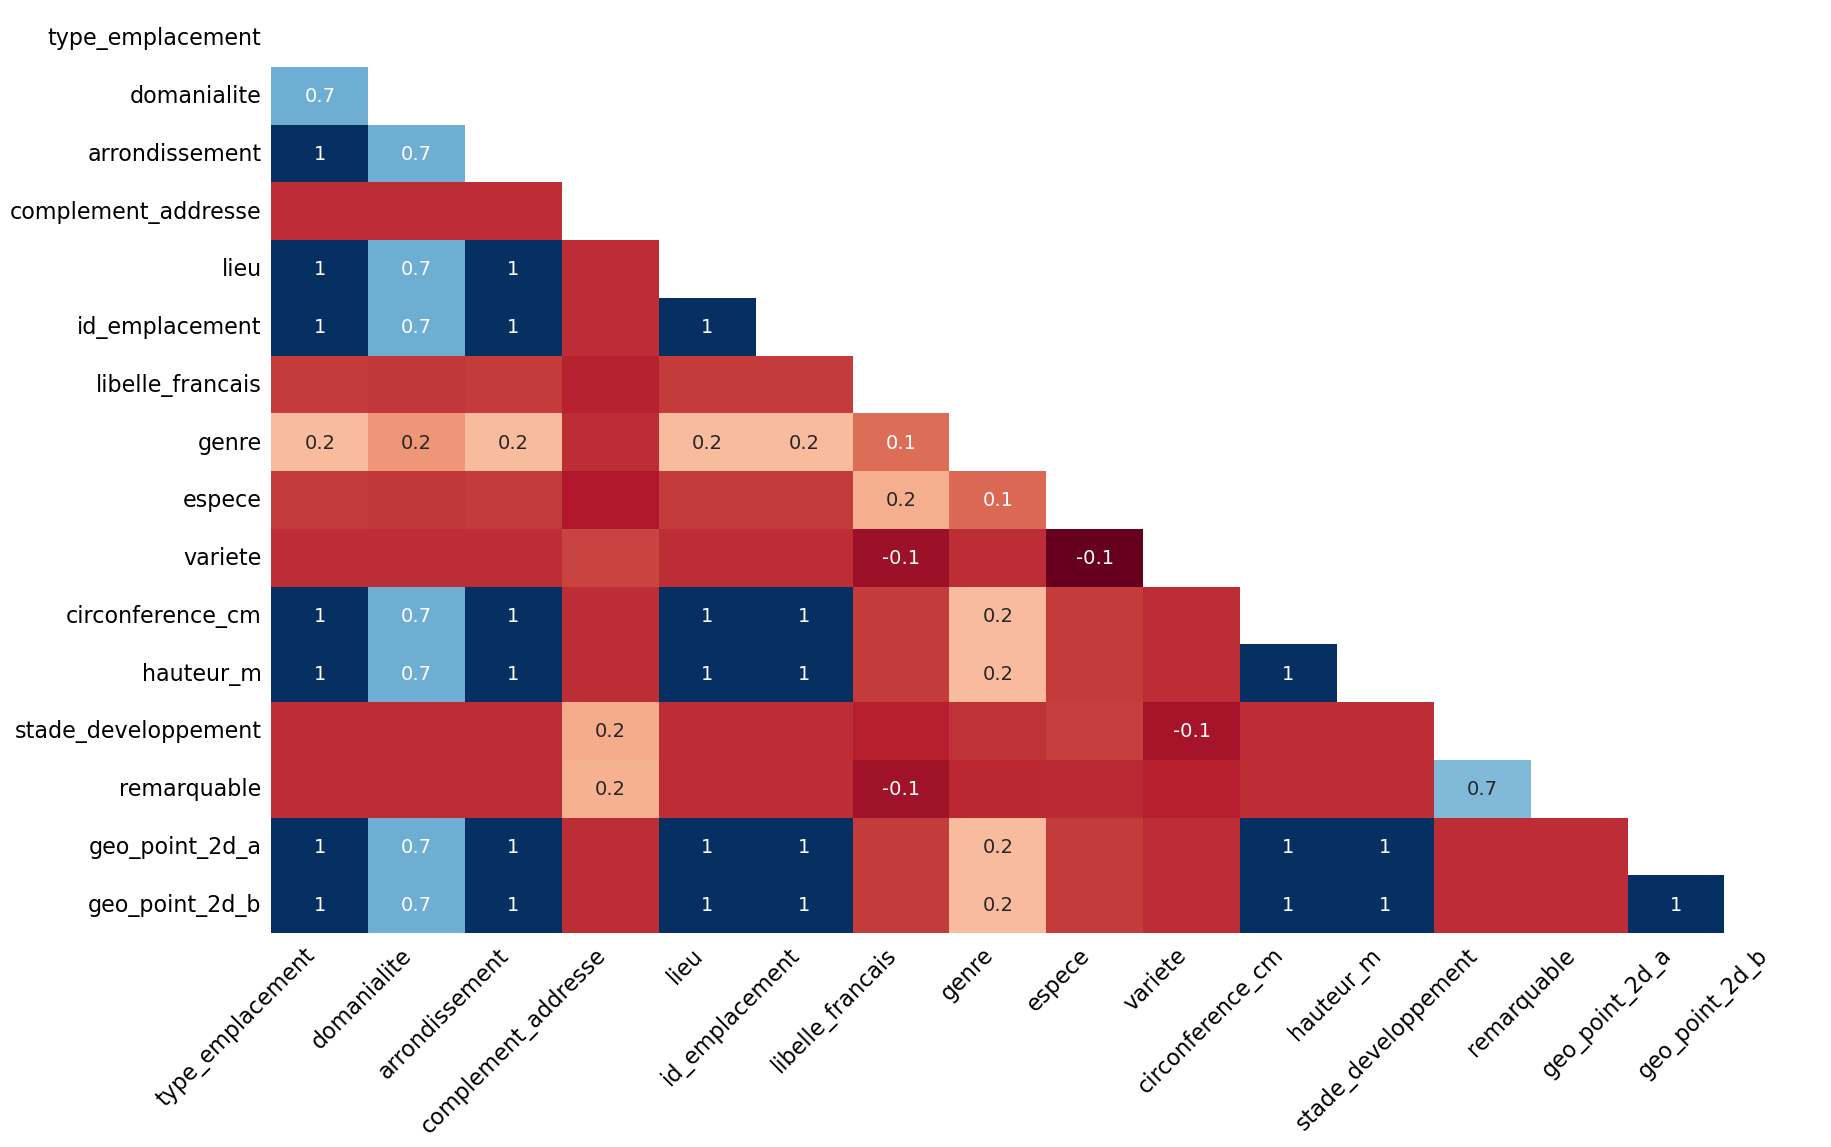

In [44]:
msno.heatmap(arbres)

1. Verification des doublons (nombre de ligne en double)

In [45]:
arbres.duplicated().sum()

0

Nous supprimons les colonnes inexploitables suivantes : numero, complement_addresse, variete, stade_developpement, et remarquable

In [46]:
arb_epur1 = arbres.drop(['numero', 'complement_addresse', 'stade_developpement', 'remarquable', 'variete'], axis=1)
arb_epur1

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,20.0,5.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,65.0,8.0,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,90.0,10.0,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,60.0,8.0,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,38.0,0.0,48.890435,2.315289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,0.0,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,0.0,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,0.0,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,0.0,0.0,48.822522,2.455956


après suppression nous obtenons les diagrammes suivantes :

- Un diagramme à bande beaucoup plus rempli, il n'y a quasiment plus de données manquantes.

<AxesSubplot:>

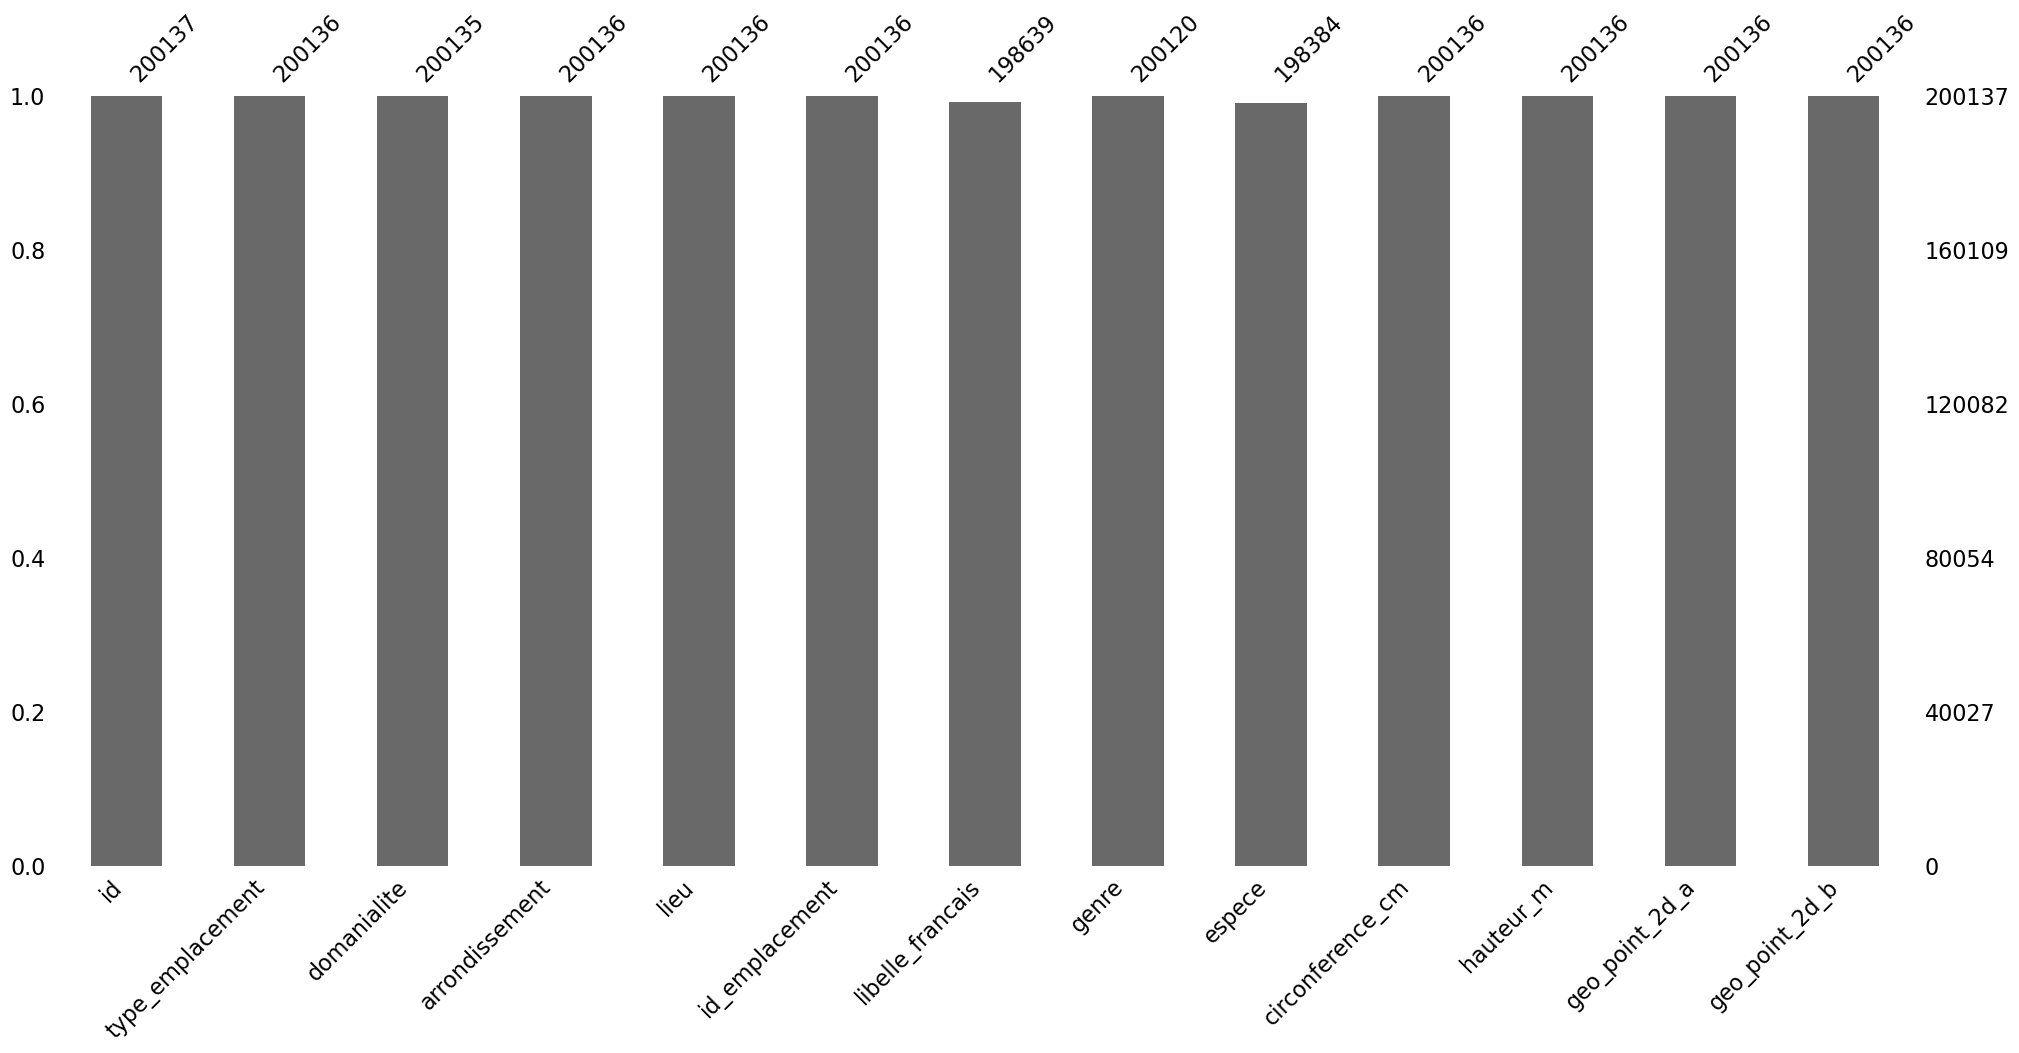

In [47]:
msno.bar(arb_epur1)

- La nouvelle matrice de données manquantes

<AxesSubplot:>

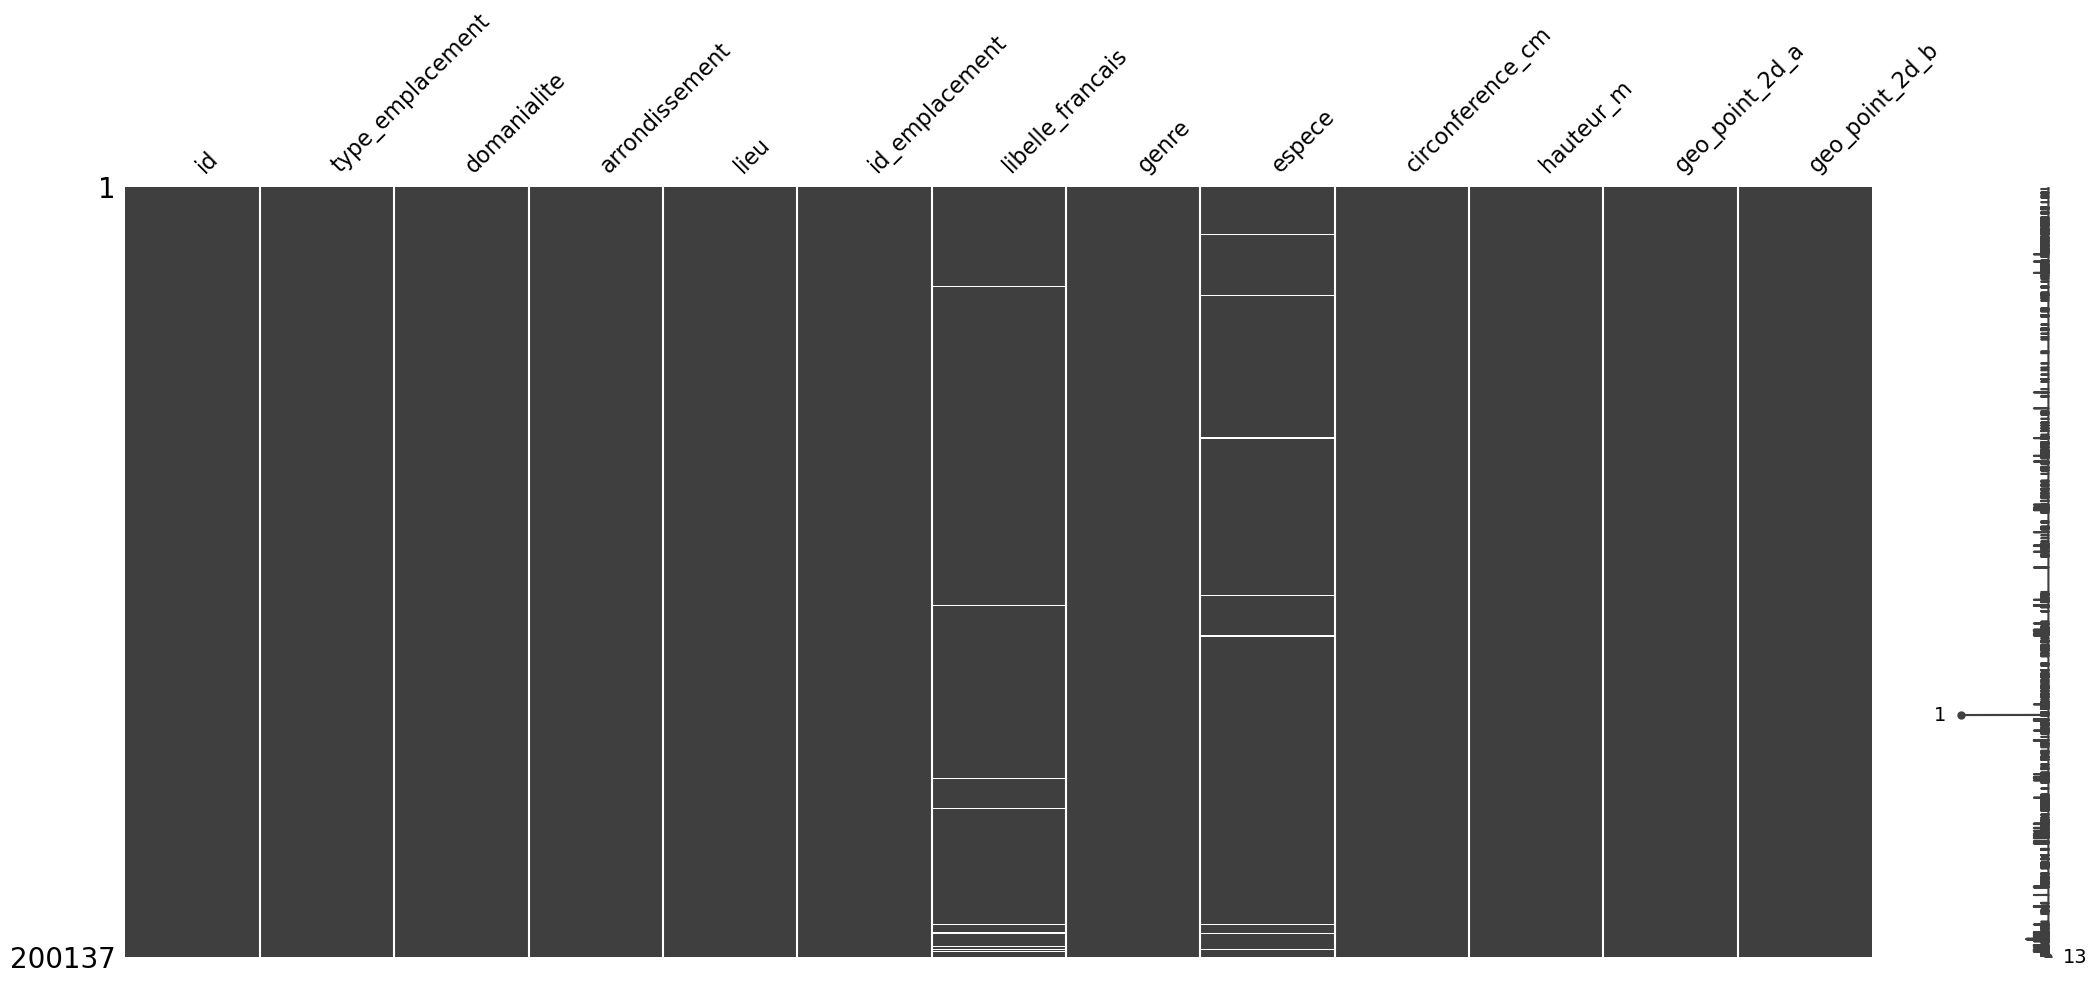

In [48]:
msno.matrix(arb_epur1)

- Le pourcentage de données manquantes dans chaque colonnes

In [49]:
pu =arbres.isna().mean()
pours_manq = pu * 100
pours_manq

id                       0.000000
type_emplacement         0.000500
domanialite              0.000999
arrondissement           0.000500
complement_addresse     84.560076
numero                 100.000000
lieu                     0.000500
id_emplacement           0.000500
libelle_francais         0.748487
genre                    0.008494
espece                   0.875900
variete                 81.624088
circonference_cm         0.000500
hauteur_m                0.000500
stade_developpement     33.579498
remarquable             31.527903
geo_point_2d_a           0.000500
geo_point_2d_b           0.000500
dtype: float64

Nous obtenons ici le nombre total d'arbre, la moyenne, le minimum, le maximum 

In [52]:
arb_epur1.describe()

,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
count,200136.000000,200136.000000,200136.000000,200136.000000
mean,83.380796,13.110550,48.854491,2.348208
std,673.191880,1971.222311,0.030234,0.051220
min,0.000000,0.000000,48.742290,2.210241
25%,30.000000,5.000000,48.835021,2.307531
50%,70.000000,8.000000,48.854162,2.351096
75%,115.000000,12.000000,48.876447,2.386838
max,250255.000000,881818.000000,48.911485,2.469759


# 3. Exploration des données

- La repatition par ordre croissant

In [97]:
tem = abr1 = arbres.groupby('arrondissement')['id'].count().reset_index()
abr1.columns = ['arrondissement','nombre']
temp = abr1.sort_values('nombre')
temp


,arrondissement,nombre
15,PARIS 2E ARRDT,548
22,PARIS 9E ARRDT,1167
16,PARIS 3E ARRDT,1209
13,PARIS 1ER ARRDT,1413
19,PARIS 6E ARRDT,1764
18,PARIS 5E ARRDT,2368
17,PARIS 4E ARRDT,2740
3,PARIS 10E ARRDT,3385
0,BOIS DE BOULOGNE,3978
2,HAUTS-DE-SEINE,5298


In [98]:
temp['arrondissement'] = ['2e','9e','3e','1er','6e','5e', '4e','10e','BdB','HdS','11e','8e', 'VdM','7e','18e','17e ','14e','BdV','SsD','12e','19e','20e', '16e', '13e','15e']


In [99]:
tp1 = temp.iloc[0:14, :]
tp2 = temp.iloc[14:25,:] 

- La repartition sur les arrondissements qui possèdent moins de 5% d'arbres sur le total des arbres sur la région parisienne.

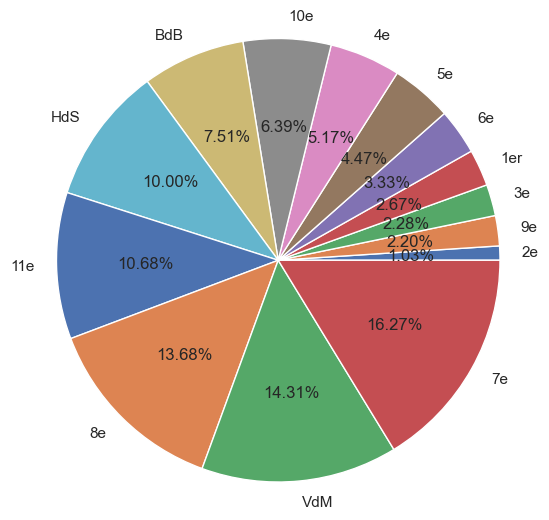

In [100]:
plt.pie(x=tp1['nombre'], labels=tp1['arrondissement'],  radius=1.5, autopct='%.2f%%')
plt.show()

- La repartition sur les arrondissements qui possèdent plus de 5% d'arbres sur le total des arbres de la région parisienne.

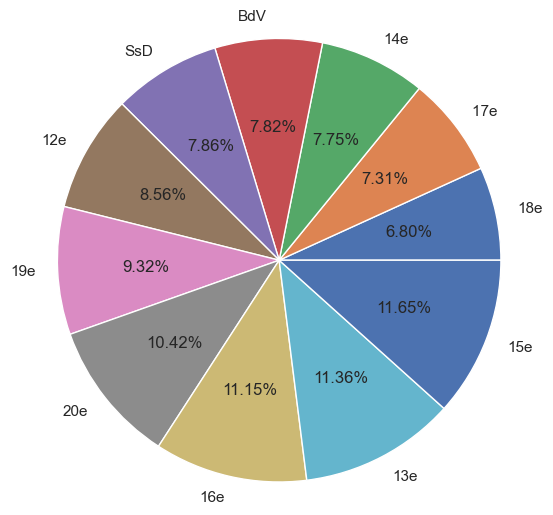

In [101]:
plt.pie(x=tp2['nombre'], labels=tp2['arrondissement'], radius=1.5, autopct='%.2f%%')
plt.show()

In [102]:
test = arb_epur1['circonference_cm']
test = test.sort_values()
test.columns = ['circonference_cm']
test

200136         0.0
24915          0.0
24914          0.0
24913          0.0
24912          0.0
            ...   
147634     65110.0
173343     79120.0
160432    120170.0
149056    250255.0
137239         NaN
Name: circonference_cm, Length: 200137, dtype: float64

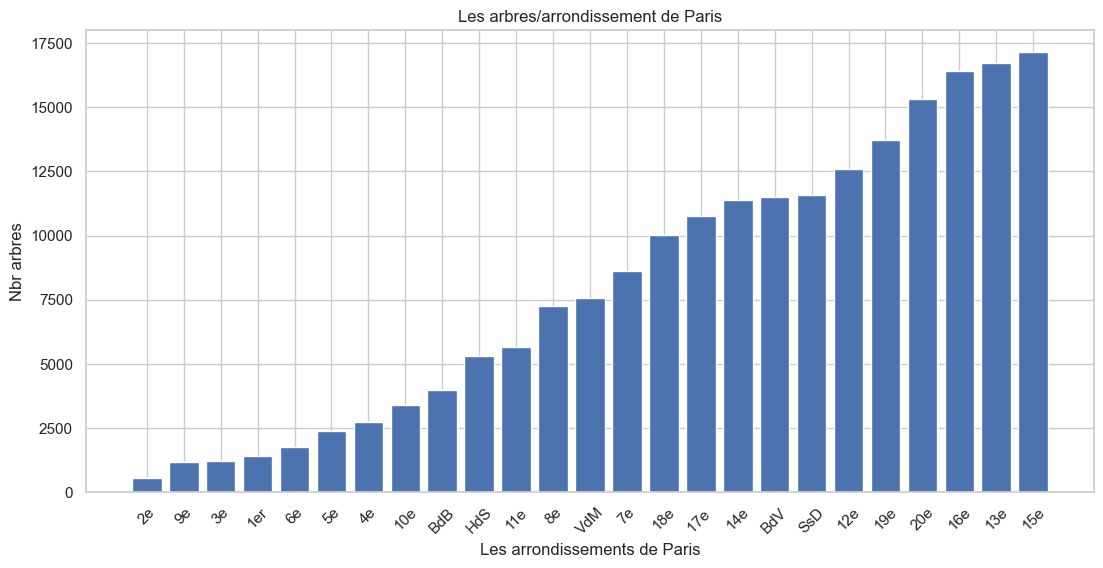

In [103]:
plt.figure(figsize=(13,6))
sns.set_theme(style='whitegrid')
plt.bar(height=temp['nombre'], x=temp['arrondissement'])
plt.title("Les arbres/arrondissement de Paris")
plt.xlabel("Les arrondissements de Paris")
plt.ylabel("Nbr arbres")
plt.xticks(rotation= 45)
plt.show()

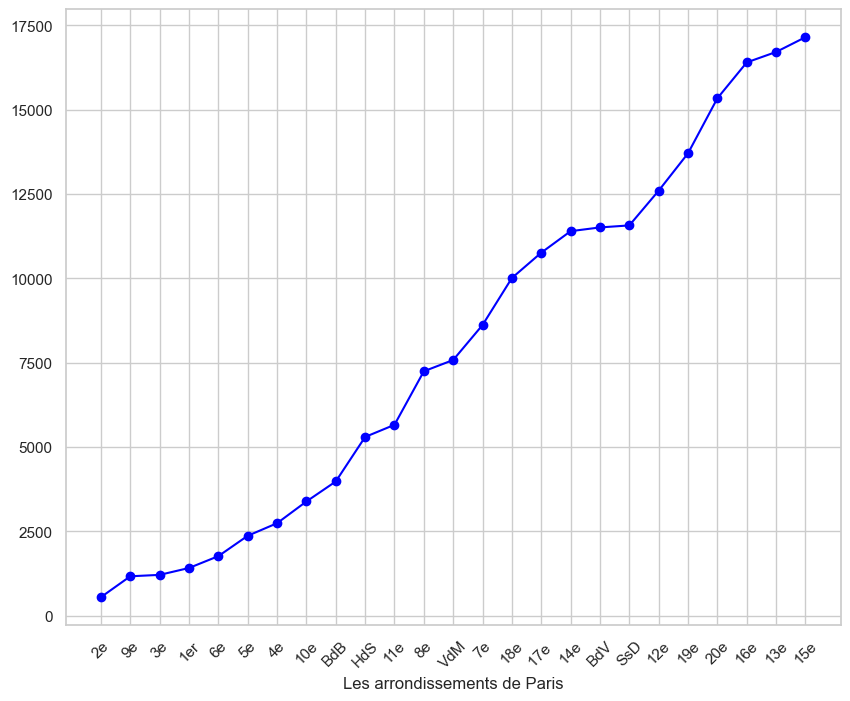

In [106]:
plt.figure(figsize=(10,8))
plt.plot(temp['arrondissement'], temp['nombre'],marker='o', linestyle='-', color='blue')
plt.xlabel("Les arrondissements de Paris")
plt.xticks(rotation= 45)
plt.show()

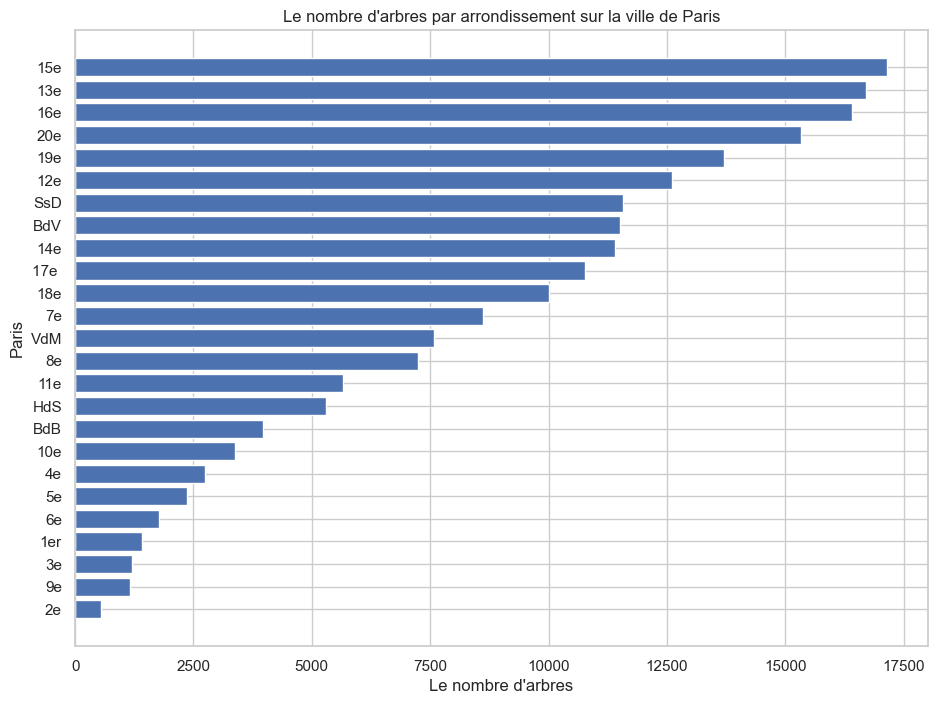

In [107]:
plt.figure(figsize=(11,8))
sns.set_theme(style='whitegrid')
y_pos = np.arange(len(temp['arrondissement']))
plt.barh(y_pos, temp['nombre'], align='center')
plt.barh ( temp['arrondissement'] , width = 0.1 , height = 0.6 , left = None,) 
plt.xlabel("Le nombre d'arbres")
plt.ylabel("Paris")
plt.title("Le nombre d'arbres par arrondissement sur la ville de Paris")
plt.show()

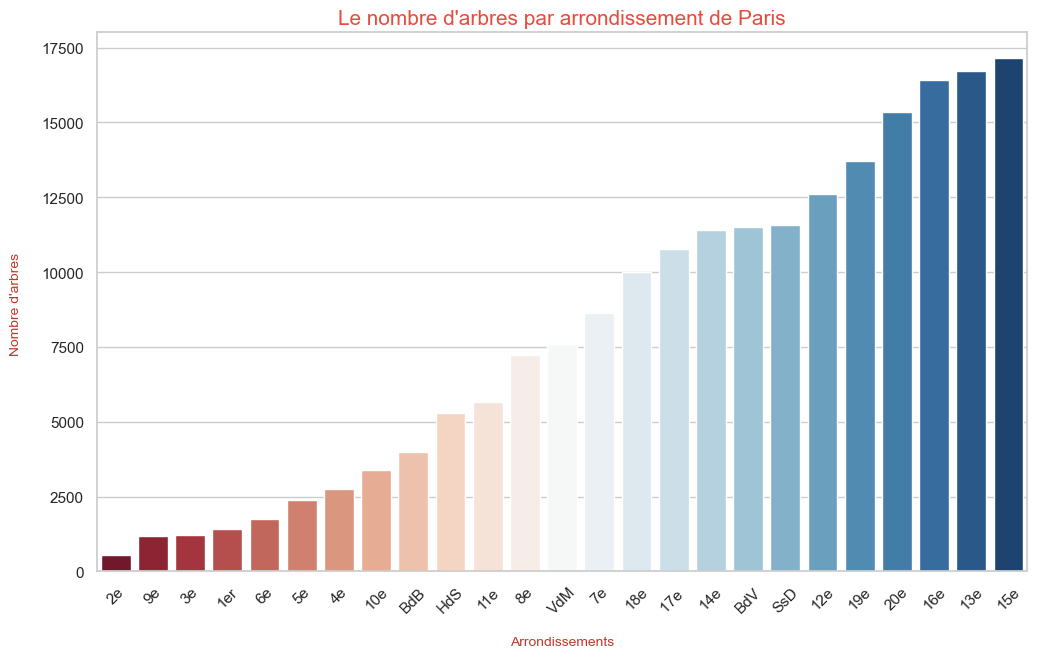

In [57]:
plt.figure(figsize=(12,7))
sns.barplot(x=temp['arrondissement'], y=temp['nombre'], palette="RdBu")
plt.xlabel('\nArrondissements', fontsize=10, color='#c0392b')
plt.ylabel("Nombre d'arbres \n", fontsize=10, color='#c0392b')
plt.title("Le nombre d'arbres par arrondissement de Paris", fontsize=15, color='#e74c3c')
plt.xticks(rotation= 45)
#plt.tight_layout()
plt.show()

- Le 15e arrondissement (Paris 15) possède le plus grand nombre d'arbres et le 2e arrondissement (Paris 02) enregistre le plus faible nombre d'arbres.

------------------------------------------------------------------------------

In [108]:
bbb=  arbres.drop(['numero','arrondissement','domanialite','id','type_emplacement','lieu','id_emplacement','libelle_francais','genre','espece','hauteur_m','geo_point_2d_a','geo_point_2d_b', 'complement_addresse', 'stade_developpement', 'remarquable', 'variete'], axis=1)
bbb


,circonference_cm
0,20.0
1,65.0
2,90.0
3,60.0
4,38.0
...,...
200132,0.0
200133,0.0
200134,0.0
200135,0.0


In [109]:
c = fol.Map(location=[ 48.890, 2.315333],zoom_start=25)
fol.Marker([48.890435, 2.315289]).add_to(c)
c.save('maCarte3.html')


In [110]:
c = fol.Map(location=[ 48.890, 2.315333],zoom_start=25)
fol.Marker([48.890435, 2.315289],popup="héé fofo").add_to(c)
fol.Marker([48.820445, 2.454856],popup="édédé ").add_to(c)
c.save('maCarte4.html')

In [111]:
bbb= bbb['circonference_cm']
bbb.sort_values()
bbb

0         20.0
1         65.0
2         90.0
3         60.0
4         38.0
          ... 
200132     0.0
200133     0.0
200134     0.0
200135     0.0
200136     0.0
Name: circonference_cm, Length: 200137, dtype: float64

In [112]:
aaa = bbb.drop(bbb.loc[(bbb==0)].index)
aaa.reset_index()
aaa

0         20.0
1         65.0
2         90.0
3         60.0
4         38.0
          ... 
198874    20.0
198875    20.0
198876    20.0
198877    20.0
198878    20.0
Name: circonference_cm, Length: 174270, dtype: float64

In [113]:
aaa = aaa.value_counts()  
aaa.head(25)

20.0     9710
70.0     6780
60.0     6369
80.0     6206
50.0     6205
40.0     6056
25.0     5837
90.0     5832
30.0     5652
100.0    5511
45.0     4962
75.0     4903
65.0     4745
110.0    4643
35.0     4534
55.0     4441
85.0     4299
120.0    3991
95.0     3809
105.0    3573
130.0    3550
140.0    2979
115.0    2975
150.0    2749
125.0    2635
Name: circonference_cm, dtype: int64

In [114]:
aaa.shape

(530,)

In [115]:
Q1 = np.percentile(aaa, 25, interpolation = 'midpoint') 
Q2 = np.percentile(aaa, 50, interpolation = 'midpoint') 
Q3 = np.percentile(aaa, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  1.0
Q1 50 percentile of the given data is,  14.0
Q1 75 percentile of the given data is,  128.0
Interquartile range is 127.0


In [116]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -189.5
up_limit is 318.5


In [117]:
outlier =[]
x=0
for x in aaa:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
outl = max(outlier)
print(' outlier in the dataset is', outl)

 outlier in the dataset is 9710


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='circonference_cm'>

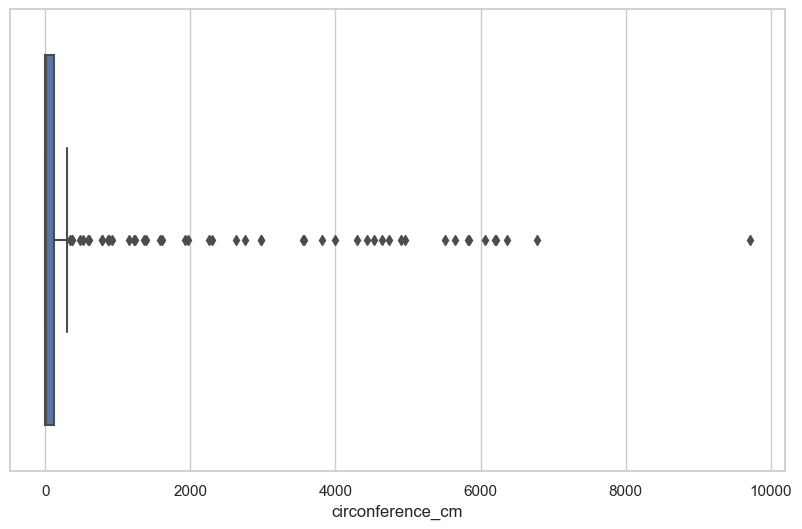

In [118]:
plt.figure(figsize=(10,6))
sns.boxplot(aaa)

In [119]:
arb_epur1.isnull().sum()

id                     0
type_emplacement       1
domanialite            2
arrondissement         1
lieu                   1
id_emplacement         1
libelle_francais    1498
genre                 17
espece              1753
circonference_cm       1
hauteur_m              1
geo_point_2d_a         1
geo_point_2d_b         1
dtype: int64

In [120]:
arb_epur1

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,20.0,5.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,65.0,8.0,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,90.0,10.0,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,60.0,8.0,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,38.0,0.0,48.890435,2.315289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,0.0,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,0.0,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,0.0,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,0.0,0.0,48.822522,2.455956


In [121]:
arbres.shape

(200137, 18)

On souhaite savoir le nombre d'arbres par arrondissement de Paris

In [ ]:
48.820445	2.454856

In [123]:
arbre_d = arbres.drop(['complement_addresse', 'numero', 'id_emplacement', 'variete', 'circonference_cm', 'remarquable', 'geo_point_2d_a', 'geo_point_2d_b'], axis=1)

La repartition sur les arrondissements qui possèdent plus de 5% d'arbres sur le total des arbres sur la région parisienne.

In [124]:
arbre_d

,id,type_emplacement,domanialite,arrondissement,lieu,libelle_francais,genre,espece,hauteur_m,stade_developpement
0,99874,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,5.0,NaN
1,99875,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,8.0,A
2,99876,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,10.0,A
3,99877,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,8.0,A
4,99878,Arbre,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Arbre à miel,Tetradium,daniellii,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,NaN,Castanea,fargesii,0.0,NaN
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Arbre aux mouchoirs,Davidia,involucrata,0.0,NaN
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Peuplier,Populus,simonii,0.0,NaN
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Chêne,Quercus,n. sp.,0.0,NaN


In [125]:
arbre_d2 = arbre_d.drop(['arrondissement', 'genre', 'stade_developpement', 'domanialite', 'hauteur_m'], axis=1)

In [126]:
arbre_d2

,id,type_emplacement,lieu,libelle_francais,espece
0,99874,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,hippocastanum
1,99875,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,baccata
2,99876,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,baccata
3,99877,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,negundo
4,99878,Arbre,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Arbre à miel,daniellii
...,...,...,...,...,...
200132,2024741,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,NaN,fargesii
200133,2024742,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Arbre aux mouchoirs,involucrata
200134,2024743,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Peuplier,simonii
200135,2024744,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Chêne,n. sp.


In [127]:
arbre_simpl = arbre_d2
arbre_simpl

,id,type_emplacement,lieu,libelle_francais,espece
0,99874,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,hippocastanum
1,99875,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,baccata
2,99876,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,baccata
3,99877,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,negundo
4,99878,Arbre,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Arbre à miel,daniellii
...,...,...,...,...,...
200132,2024741,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,NaN,fargesii
200133,2024742,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Arbre aux mouchoirs,involucrata
200134,2024743,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Peuplier,simonii
200135,2024744,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Chêne,n. sp.


In [128]:
arbre_d3 = arbre_d2.dropna(axis=0)

In [129]:
arbre_d3.shape

(197252, 5)

In [130]:
arbre_d3.describe()

,id,type_emplacement,lieu,libelle_francais,espece
count,197252,197252,197252,197252,197252
unique,197252,1,6876,191,520
top,99874,Arbre,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Platane,x hispanica
freq,1,197252,2983,42505,36242


In [131]:
arbre_d3['libelle_francais'].value_counts()

Platane       42505
Marronnier    25207
Tilleul       21305
Erable        18389
Sophora       11797
              ...  
Maackie           1
Jujubier          1
Camphrier         1
Sycopsis          1
Garrya            1
Name: libelle_francais, Length: 191, dtype: int64

In [132]:
vue=arbres.groupby(['arrondissement','lieu','genre']) ['circonference_cm'].value_counts()
vue.shape

(86181,)

In [133]:
vue.sort_values()

arrondissement     lieu                                         genre     circonference_cm
PARIS 17E ARRDT    SQUARE DES BATIGNOLLES                       Acer      18.0                  1
PARIS 19E ARRDT    PLACE RHIN ET DANUBE                         Platanus  35.0                  1
                                                                          55.0                  1
                                                                          70.0                  1
                                                                          115.0                 1
                                                                                             ... 
BOIS DE VINCENNES  AVENUE DES TRIBUNES                          Platanus  0.0                 248
                   ROUTE DAUPHINE                               Tilia     0.0                 305
                   PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE  Quercus   0.0                 310
                           

In [134]:
vue

arrondissement    lieu                                                    genre     circonference_cm
BOIS DE BOULOGNE  ALLEE DE LA REINE MARGUERITE                            Acer      30.0                11
                                                                                    25.0                 9
                                                                                    42.0                 8
                                                                                    40.0                 7
                                                                                    43.0                 7
                                                                                                        ..
VAL-DE-MARNE      CIMETIERE DE THIAIS / AVENUE TRANSVERSALE N3 / DIV 122  Platanus  0.0                  5
                  CIMETIERE DE THIAIS / DIV 94                            Malus     20.0                 1
                  CIMETIERE DE THIAIS / ENT

In [135]:
data = arbres['circonference_cm'].sort_values().reset_index()
data


,index,circonference_cm
0,200136,0.0
1,24915,0.0
2,24914,0.0
3,24913,0.0
4,24912,0.0
...,...,...
200132,147634,65110.0
200133,173343,79120.0
200134,160432,120170.0
200135,149056,250255.0


In [136]:
data.shape


(200137, 2)

In [137]:
data.dropna(axis = 0, inplace=True)

In [138]:
crois_data = np.sort(data['circonference_cm'])
crois_data

array([     0.,      0.,      0., ...,  79120., 120170., 250255.])

In [139]:
crois_data.shape


(200136,)

In [140]:
Q1 = np.percentile(crois_data, 25, interpolation = 'midpoint') 
Q2 = np.percentile(crois_data, 50, interpolation = 'midpoint') 
Q3 = np.percentile(crois_data, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  30.0
Q1 50 percentile of the given data is,  70.0
Q1 75 percentile of the given data is,  115.0
Interquartile range is 85.0


In [144]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -97.5
up_limit is 242.5


In [145]:
outlier =[]
x=0
for x in crois_data:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
outl = max(outlier)
print(' outlier in the dataset is', outl)

 outlier in the dataset is 250255.0


In [156]:
data = arbres['hauteur_m'].sort_values().reset_index()
data

,index,hauteur_m
0,200136,0.0
1,133704,0.0
2,133695,0.0
3,133692,0.0
4,133683,0.0
...,...,...
200132,101985,2015.0
200133,152110,2525.0
200134,150101,5155.0
200135,182852,881818.0


In [157]:
data.shape

(200137, 2)

In [158]:
data.dropna(axis = 0, inplace=True)

In [159]:
data.shape

(200136, 2)

In [160]:
crois_data = np.sort(data['hauteur_m'])
crois_data

array([     0.,      0.,      0., ...,   2525.,   5155., 881818.])

In [161]:
Q1 = np.percentile(crois_data, 25, interpolation = 'midpoint') 
Q2 = np.percentile(crois_data, 50, interpolation = 'midpoint') 
Q3 = np.percentile(crois_data, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  5.0
Q1 50 percentile of the given data is,  8.0
Q1 75 percentile of the given data is,  12.0
Interquartile range is 7.0


In [153]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -5.5
up_limit is 22.5


In [162]:
outlier =[]
x=0
for x in crois_data:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
outl = max(outlier)
print(' outlier in the dataset is', outl)

 outlier in the dataset is 881818.0
